In [14]:
import os
import pandas as pd

SAVEPATH = "./3. Parameter Variation Medium Effort/Plots/"

# Define the path to the main folder
main_folder = "./3. Parameter Variation Medium Effort/Results/"

# Initialize a list to store data
data = []

# Iterate through each subfolder
for subfolder in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder)
    
    # Check if it is a directory
    if os.path.isdir(subfolder_path):
        # Extract COC, CER, and COR values from the folder name
        try:
            parts = subfolder.split('_')
            coc = float(parts[7])
            cer = float(parts[9])
            cor = float(parts[11])
        except (IndexError, ValueError):
            print(f"Skipping invalid folder name: {subfolder}")
            continue

        # Path to the output_metrics file
        metrics_file = os.path.join(subfolder_path, "output_metrics.csv")

        
        # Read the metrics file
        if os.path.exists(metrics_file):
            try:
                # Read the file as a DataFrame (tab-separated)
                df_metrics = pd.read_csv(metrics_file, sep=";")

                # Convert the DataFrame into a dictionary {Metric Name: Metric Value}
                metrics_dict = dict(zip(df_metrics["Metric Name"], df_metrics["Metric Value"]))

                # Append parsed data to the list
                data.append([
                    coc, cer, cor,
                    metrics_dict["T15Year"], metrics_dict["T15CO2"], metrics_dict["T15ForestSize"],
                    metrics_dict["T20Year"], metrics_dict["T20CO2"], metrics_dict["T20ForestSize"],
                    metrics_dict["ForestSize2050"], metrics_dict["CO2Concentration2050"], metrics_dict["Temperature2050"],
                    metrics_dict["ForestSize2100"], metrics_dict["CO2Concentration2100"], metrics_dict["Temperature2100"]
                ])
            except KeyError:
                print(f"Skipping {subfolder}: Missing expected metric names in output_metrics.")
            except Exception as e:
                print(f"Error processing {subfolder}: {e}")
        else:
            print(f"Missing output_metrics in {subfolder}")



# Create a DataFrame
columns = [
    "Offset Credits Cost Adjustment", "Emission Reduction Cost Adjustment", "Reforestation Cost Adjustment",
    "T15Year", "T15CO2", "T15ForestSize",
    "T20Year", "T20CO2", "T20ForestSize",
    "ForestSize2050", "CO2Concentration2050", "Temperature2050",
    "ForestSize2100", "CO2Concentration2100", "Temperature2100"
]
df = pd.DataFrame(data, columns=columns)

# Optionally, save the DataFrame to a CSV file
df.to_csv("./3. Parameter Variation Medium Effort/parsed_output.csv", index=False)

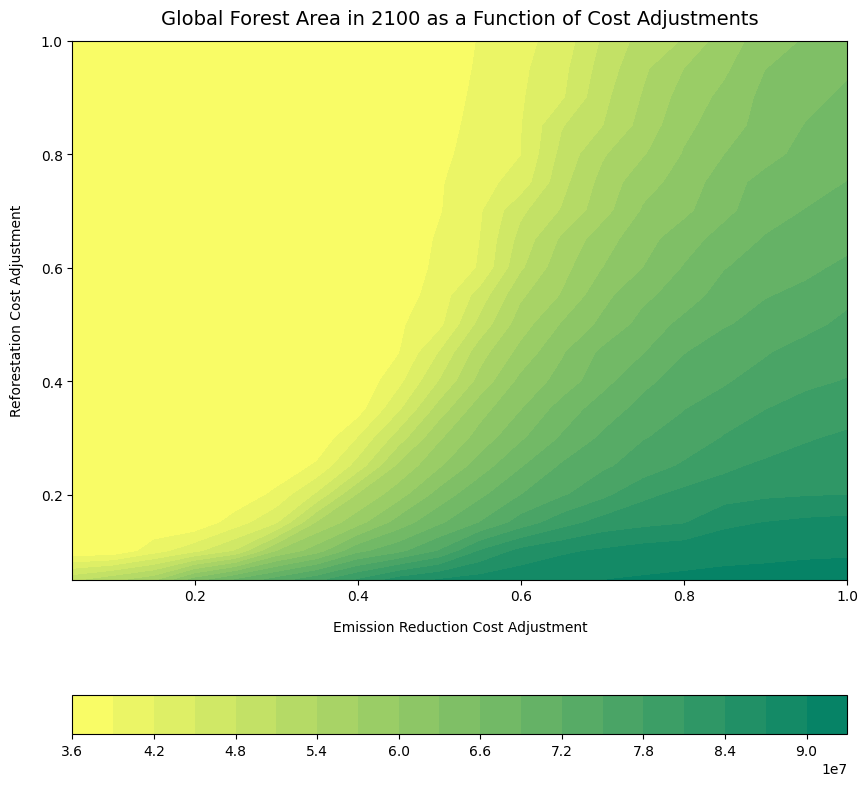

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.interpolate
import numpy as np

# Create a grid for contour plot
x = df["Emission Reduction Cost Adjustment"]
y = df["Reforestation Cost Adjustment"]
z = df["ForestSize2100"]


# Create a structured grid for interpolation
x_unique = np.sort(df["Emission Reduction Cost Adjustment"].unique())
y_unique = np.sort(df["Reforestation Cost Adjustment"].unique())
X, Y = np.meshgrid(x_unique, y_unique)

# Interpolate Z values on the grid
Z = scipy.interpolate.griddata((df["Emission Reduction Cost Adjustment"], df["Reforestation Cost Adjustment"]), 
                               df["ForestSize2100"], (X, Y), method="cubic")

# Generate contour plot
plt.figure(figsize=(10, 10))
contour = plt.contourf(X, Y, Z, cmap="summer_r", levels=20)
bar = plt.colorbar(orientation='horizontal')
plt.xlabel("Emission Reduction Cost Adjustment", labelpad=12)
plt.ylabel("Reforestation Cost Adjustment", labelpad=12)
plt.title("Global Forest Area in 2100 as a Function of Cost Adjustments", fontsize=14, pad=12)
plt.savefig(f"{SAVEPATH}/forest_contour.pdf", format="pdf", bbox_inches="tight")

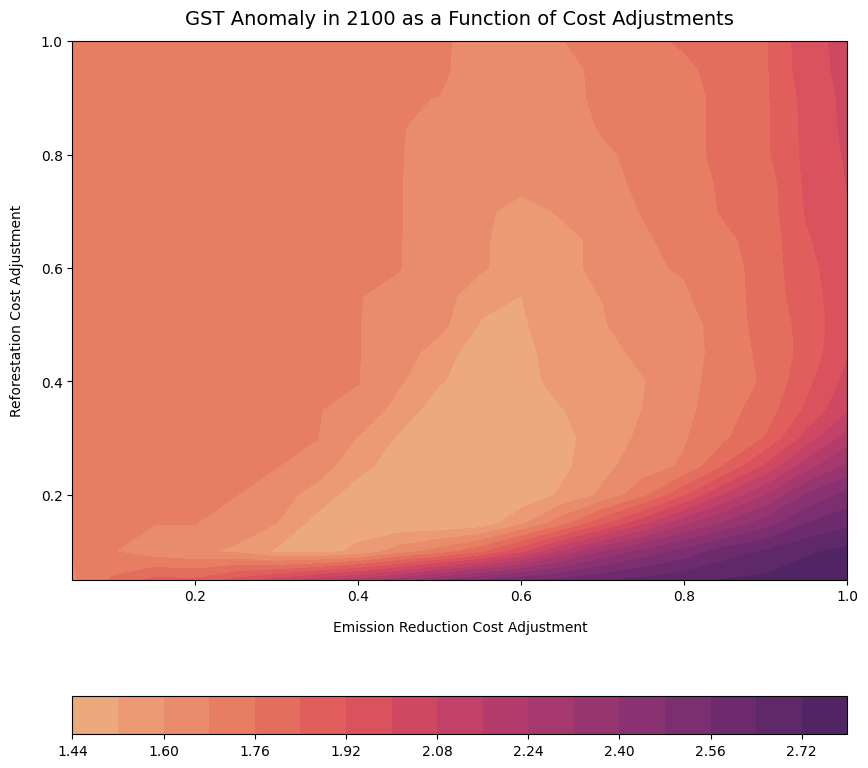

In [16]:
# Create a grid for contour plot
x = df["Emission Reduction Cost Adjustment"]
y = df["Reforestation Cost Adjustment"]
z = df["Temperature2100"]


# Create a structured grid for interpolation
x_unique = np.sort(df["Emission Reduction Cost Adjustment"].unique())
y_unique = np.sort(df["Reforestation Cost Adjustment"].unique())
X, Y = np.meshgrid(x_unique, y_unique)

# Interpolate Z values on the grid
Z = scipy.interpolate.griddata((df["Emission Reduction Cost Adjustment"], df["Reforestation Cost Adjustment"]), 
                               df["Temperature2100"], (X, Y), method="cubic")

# Generate contour plot
plt.figure(figsize=(10, 10))
contour = plt.contourf(X, Y, Z, cmap="flare", levels=20)
bar = plt.colorbar(orientation='horizontal')
plt.xlabel("Emission Reduction Cost Adjustment", labelpad=12)
plt.ylabel("Reforestation Cost Adjustment", labelpad=12)
plt.title("GST Anomaly in 2100 as a Function of Cost Adjustments", fontsize=14, pad=12)
plt.savefig(f"{SAVEPATH}/gst_contour.pdf", format="pdf", bbox_inches="tight")

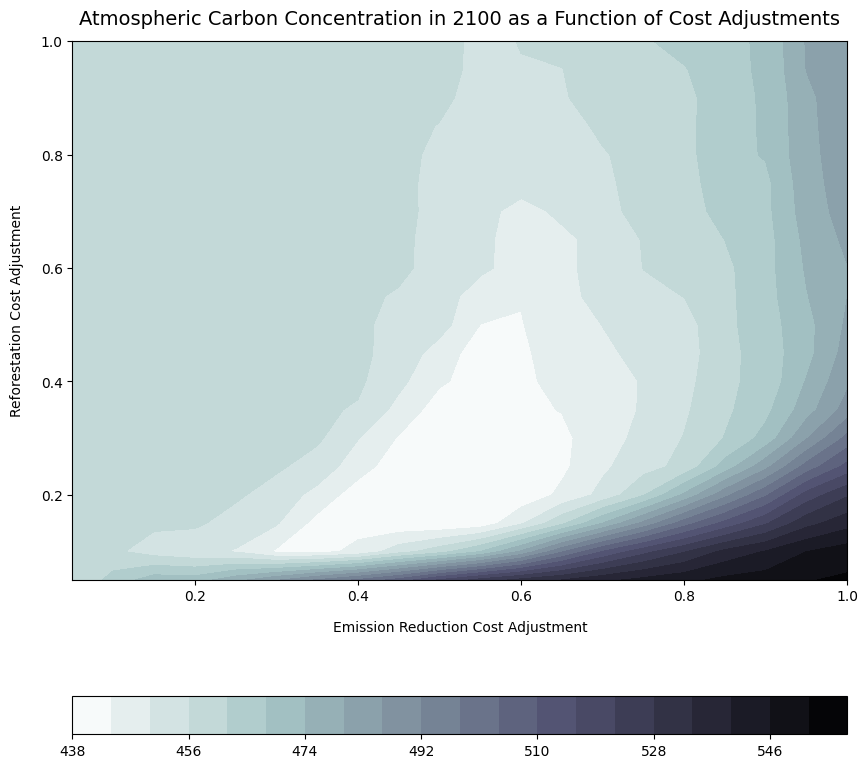

In [17]:
# Create a grid for contour plot
x = df["Emission Reduction Cost Adjustment"]
y = df["Reforestation Cost Adjustment"]
z = df["CO2Concentration2100"]


# Create a structured grid for interpolation
x_unique = np.sort(df["Emission Reduction Cost Adjustment"].unique())
y_unique = np.sort(df["Reforestation Cost Adjustment"].unique())
X, Y = np.meshgrid(x_unique, y_unique)

# Interpolate Z values on the grid
Z = scipy.interpolate.griddata((df["Emission Reduction Cost Adjustment"], df["Reforestation Cost Adjustment"]), 
                               df["CO2Concentration2100"], (X, Y), method="cubic")

# Generate contour plot
plt.figure(figsize=(10, 10))
contour = plt.contourf(X, Y, Z, cmap="bone_r", levels=20)
bar = plt.colorbar(orientation='horizontal')
# bar.set_label("Atmospheric Carbon Concentration (ppm)", labelpad=12)
plt.xlabel("Emission Reduction Cost Adjustment", labelpad=12)
plt.ylabel("Reforestation Cost Adjustment", labelpad=12)
plt.title("Atmospheric Carbon Concentration in 2100 as a Function of Cost Adjustments", fontsize=14, pad=12)
plt.savefig(f"{SAVEPATH}/carbon_contour.pdf", format="pdf", bbox_inches="tight")

'./Effort_Comparison.pdf'

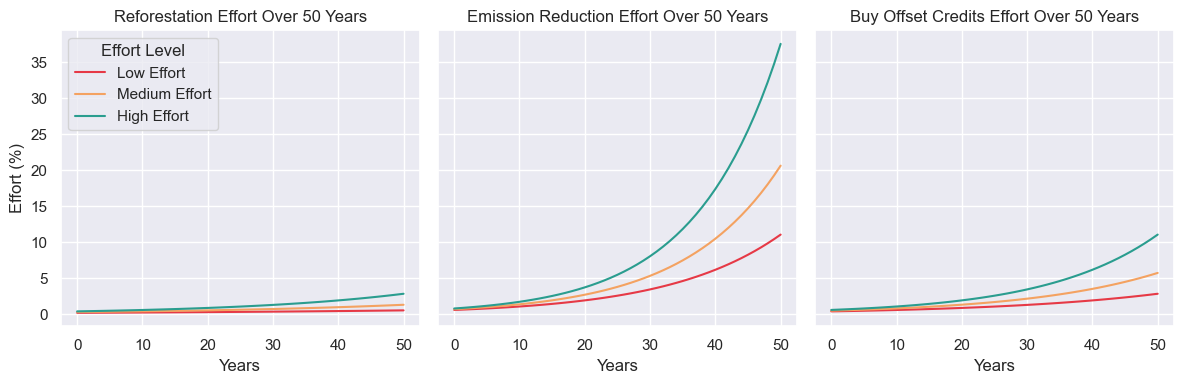